# Проверка гипотез интернет-магазина

Совместно с отделом маркетинга подготовлен список гипотез для увеличения выручки. Необходимо приоритезировать гипотезы, запустить A/B-тест и проанализировать результаты. 

План работы:
1. Приоритезация гипотез методом ICE
2. Приоритезация гипотез методом RICE
3. Сравнение результатов, выводы
4. График кумулятивной выручки по группам, выводы и предположения.
5. График кумулятивного среднего чека по группам, выводы и предположения.
6. График относительного изменения кумулятивного среднего чека группы B к группе A, выводы и предположения.
7. График кумулятивного среднего количества заказов на посетителя по группам, выводы и предположения.
8. График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A, выводы и предположения.
9. Точечный график количества заказов по пользователям,выводы и предположения.
10. Рассчет 95-й и 99-й перцентилей количества заказов на пользователя, определение границы аномальных пользователей.
11. Точечный график стоимостей заказов, выводы и предположения.
12. Рассчет 95-й и 99-й перцентилей стоимости заказов, определение границы аномальных заказов.
13. Рассчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным, выводы и предположения.
14. Рассчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным, выводы и предположения.
15. Рассчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным, выводы и предположения.
16. Рассчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным, выводы и предположения.
17. Решение по результатам теста и комментарии.





In [13]:
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

In [14]:

hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv', sep=',')
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [15]:
hypothesis.columns=['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

### Приоритезация гипотез методом ICE

In [16]:
pd.options.display.max_colwidth = 120
hypothesis['ICE']=hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Наиболее перспекивные гипотезы по ICE:

Запустить акцию, дающую скидку на товар в день рождения (8), 
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (0), 
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (7)

### Приоритезация гипотез методом RICE

In [5]:
hypothesis['RICE']=hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы по RICE: 
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (7), 
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (2), 
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	(0), 
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию (6), получается что в лидерах по обоим методам только гипотезы: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", причем лидер по ICE, даже не входит в ТОП 4  по RICE, это связано с тем, что охват аудитории у гипотезы "Запустить акцию, дающую скидку на товар в день рождения" самый низкий, всего единица, при этом у гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" reach максимальный - 10. По итогам проверки двумя методами самые перспективные гипотезы: 
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (7), Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (0).

In [17]:
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv', sep=',')
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [18]:
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv', sep=',')
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


Ознакомимся с общей информацией о датафреймах, осуществим проверку пропущенных значений и дубликатов

In [19]:
display(orders.info())
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [20]:
display(orders.isna().sum())
visitors.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

In [21]:
display(orders.duplicated().sum())
visitors.duplicated().sum()


0

0

В результате проверки, пропущенных значений и дубликатов не обнаружено

In [22]:
display(orders['visitorId'].nunique())
orders.groupby('group')['visitorId'].nunique()

1031

group
A    503
B    586
Name: visitorId, dtype: int64

Есть пересечения по пользователям

In [23]:
groupa=orders.loc[orders['group']=='A'].sort_values(by=['visitorId'])
groupa_id=groupa['visitorId'].unique()
groupb=orders.loc[orders['group']=='B'].sort_values(by=['visitorId'])
groupb_id=groupb['visitorId'].unique()
double = set(groupa_id).intersection(groupb_id)
double

{8300375,
 199603092,
 232979603,
 237748145,
 276558944,
 351125977,
 393266494,
 457167155,
 471551937,
 477780734,
 818047933,
 963407295,
 1230306981,
 1294878855,
 1316129916,
 1333886533,
 1404934699,
 1602967004,
 1614305549,
 1648269707,
 1668030113,
 1738359350,
 1801183820,
 1959144690,
 2038680547,
 2044997962,
 2378935119,
 2458001652,
 2579882178,
 2587333274,
 2600415354,
 2654030115,
 2686716486,
 2712142231,
 2716752286,
 2780786433,
 2927087541,
 2949041841,
 2954449915,
 3062433592,
 3202540741,
 3234906277,
 3656415546,
 3717692402,
 3766097110,
 3803269165,
 3891541246,
 3941795274,
 3951559397,
 3957174400,
 3963646447,
 3972127743,
 3984495233,
 4069496402,
 4120364173,
 4186807279,
 4256040402,
 4266935830}

Получили список из 58 пользователей, которые есть в обеих группах

### График кумулятивной выручки по группам

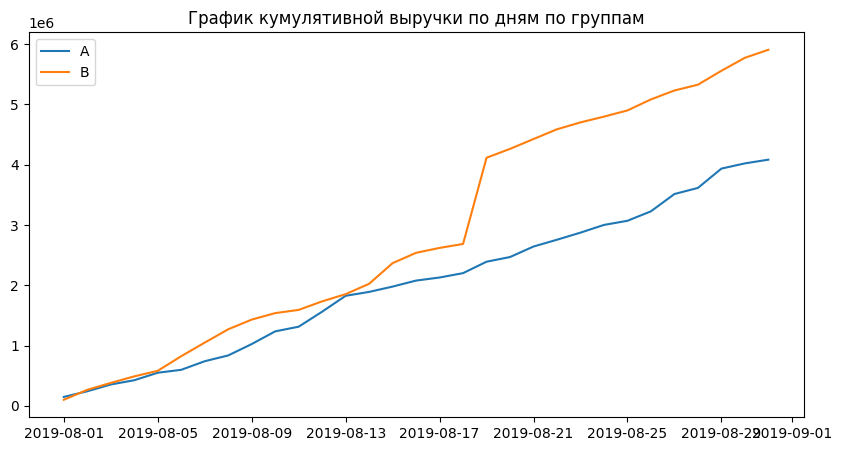

In [25]:
register_matplotlib_converters()

orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv', sep=',')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv', sep=',')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']



# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по дням по группам')
plt.legend() 
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

У группы А идет стабильный рост на протяжении всего периода исследование, а у группы В после 17.08.2019 идет резкий скачок вверх и остаток теста сегмент В лидирует, возможно мы имеем дело с аномально крупными заказами, которые влияют на результаты теста, необходимо проверить и в случае выявления их удалить

### График кумулятивного среднего чека по группам

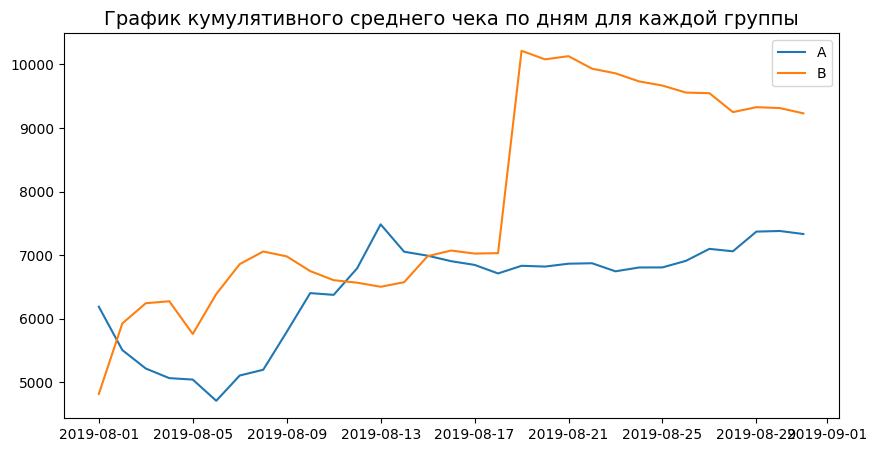

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по дням для каждой группы', fontsize=14)
plt.legend()


График кумулятивного среднего чека колеблется и опять же, в аналогичный период, как и с кумулятивной выручкой, у группы В резкий рост среднего чека, требуется анализ выбросов

### График относительного изменения кумулятивного среднего чека группы B к группе A

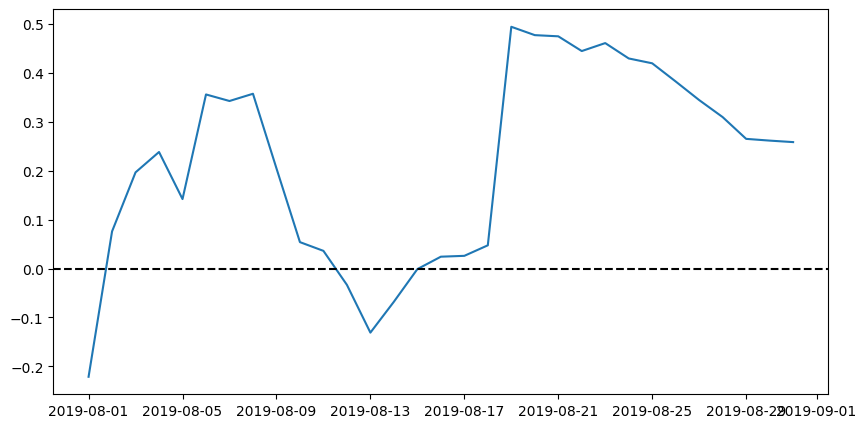

In [27]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(10, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
'График относительного различия кумулятивной конверсии между группами'
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

Результаты теста в значительной степени и резко менялись в несколько дат, по всей виимости именно в эти даты и были совершены аномальные заказы

### График кумулятивного среднего количества заказов на посетителя по группам

(18109.0, 18138.0, 0.0, 0.05)

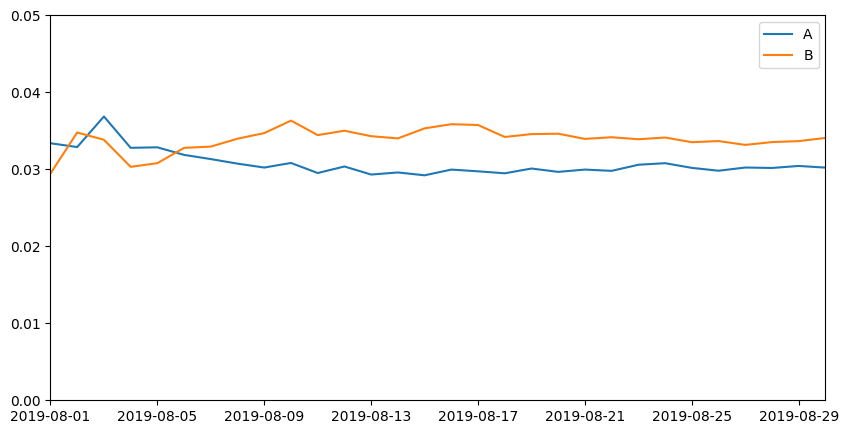

In [28]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(10, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 30), 0, 0.05])  

В начале теста сегмент А имел высокую конверсию, затем идет синхронный спад и после 05.08.2019 идет  спад у сегмента А и рост у сегмента В. Абсолютное значение колебания за период теста небольшое: от 3% до 4%.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

(18109.0, 18138.0, -0.3, 0.3)

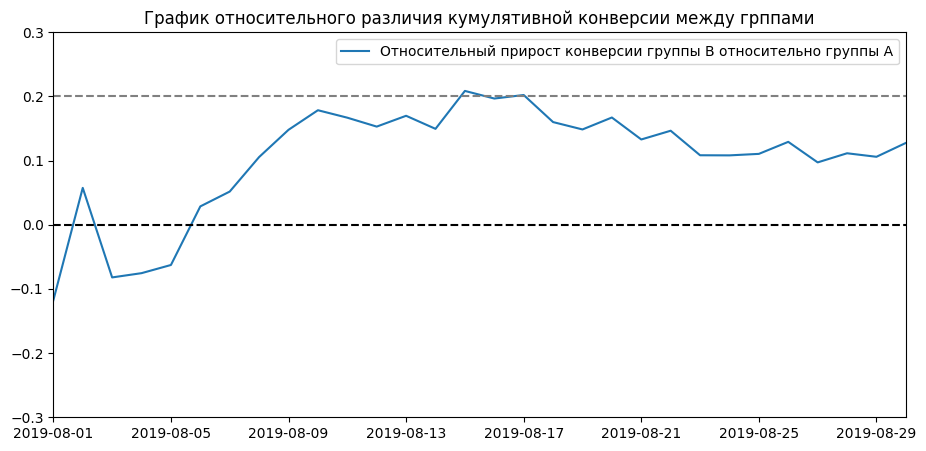

In [29]:

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(11, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.title('График относительного различия кумулятивной конверсии между грппами')
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-30', -0.3, 0.3])


Почти с самого начала теста группа B лидирует по конверсии: становится лучше и лучше, зафиксировалась около прироста в 20% относительно группы A в середине теста и снизилась до 10% к концу теста.

### Точечный график количества заказов по пользователям

In [30]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)
 

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


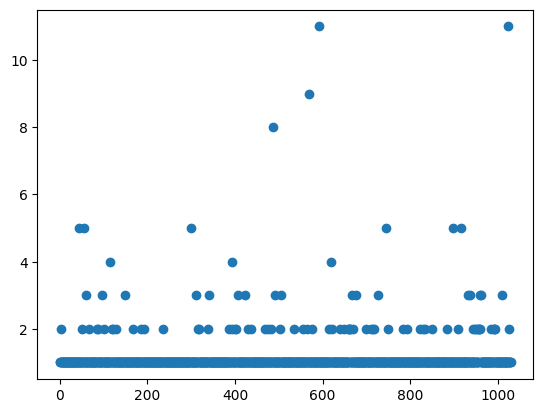

In [31]:

x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 

Большинство пользователей совершили один заказ, значительная доля пользователей - два заказа, пользователей, которые совершили три заказа и более совсем мало, рассчитаем перцентили.

### Рассчет 95-й и 99-й перцентилей количества заказов на пользователя, определение границы аномальных пользователей

In [32]:
# Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.
np.percentile(ordersByUsers['orders'], [90, 95, 99]) 

array([1., 2., 4.])

Всего 5% пользователей совершили более двух заказов и только 1% 4 и более, определим значение 4 за аномальное

### Точечный график стоимостей заказов

In [33]:
orders.sort_values(by='revenue', ascending=False).head(10)



,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


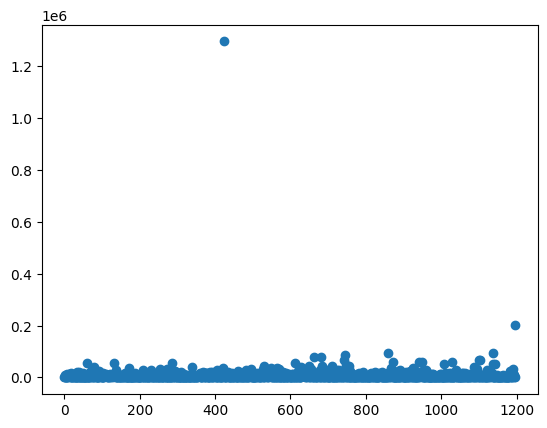

In [34]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

Мы видим как минимум два аномальных заказа, рассчитаем перцентили, чтобы отсечь аномалии

### Рассчет 95-й и 99-й перцентилей стоимости заказов, определение границы аномальных заказов

In [35]:
np.percentile(orders['revenue'], [90, 95, 99]) 

array([18168. , 28000. , 58233.2])

Заказы более 28000 - не более 5%  и около 1% заказов более 58000, определим аномальное значение на уровне 30000

### Рассчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя между группами по «сырым» данным — без удаления аномальных пользователей.


Сформулируем гипотезы: 

Нулевая гипотеза: различий в среднем количестве заказов между группами А и В нет.

Альтернативная гипотеза: различия в среднем количестве заказов между группами есть.

In [36]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value для сравнения среднего между группами',"{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительное различие в среднем между группами',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

p-value меньше 0,05 - отвергаем нулевую гипотезу, в среднем количестве заказов есть статистически значимые различия.

Относительный прирост конверсии группы В в районе 13.8%

### Рассчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным — без удаления аномальных пользователей. 

Сформулируем гипотезы:

Нулевая: различий в среднем чеке между группами нет.

Альтернативная: различия в среднем чеке между группами есть.

In [37]:
print('p-value для сравнения средних чеков между группами','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека группы B','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value для сравнения средних чеков между группами 0.729
Относительный прирост среднего чека группы B 0.259


p-value больше 0,05, нулевая гипотеза не отклонена. Статистически значимых различий в среднем чеке между группами нет

### Рассчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [38]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head(5)

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
dtype: int64

In [39]:
np.percentile(orders['revenue'], [90, 95, 99]) 

array([18168. , 28000. , 58233.2])

Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным.

Сформулируем гипотезы:

Нулевая: различий в среднем количестве заказов на посетителя между группами нет.

Альтернативная: различия в среднем количестве заказов между группами есть.

In [40]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('p-value для сравнения среднего количества заказов между очищенными группами','{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего количества заказов очищенной группы B','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value для сравнения среднего количества заказов между очищенными группами 0.01832
Относительный прирост среднего количества заказов очищенной группы B 0.148


По аналогии с сырыми данными статистическая значимость достигнута, относительный прирост конверсии группы В в районе 14,8%

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Сформулируем гипотезы:

Нулевая: различий в среднем чеке между группами нет.

Альтернативная: различия в среднем чеке между группами есть.

In [41]:
print('p-value для сравнения средних чеков между очищенными группами',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительный прирост среднего чека очищенной группы B',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value для сравнения средних чеков между очищенными группами 0.958
Относительный прирост среднего чека очищенной группы B -0.020


После удаления аномалий p-value = 0.958 больше 0.05, значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, не отвергаем. Однако относительный проигрыш группы B равен 2%.

# Выводы:

По результатам анализа гипотез выявлено, что наиболее перспекивные гипотезы по методу ICE:  
- Запустить акцию, дающую скидку на товар в день рождения (8),   
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (0), 
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (7) 

Наиболее перспективные гипотезы по RICE: 
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (7), 
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (2), 
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (0), 
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию (6),
Таким образом, в лидерах по обоим методам только гипотезы: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", причем лидер по ICE, даже не входит в ТОП 4 по RICE, это связано с тем, что охват аудитории у гипотезы "Запустить акцию, дающую скидку на товар в день рождения" самый низкий, всего единица, при этом у гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" reach максимальный - 10. Делаем вывод, что по итогам проверки двумя методами самые перспективные гипотезы:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (7), 
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (0).

По графику кумулятивной выручки по группам мя наблюдаем у группы А идет стабильный рост на протяжении всего периода исследование, а у группы В после 17.08.2019 идет резкий скачок вверх и остаток теста сегмент В лидирует, возможно мы имеем дело с аномально крупными заказами, которые влияют на результаты теста. Что касается графика кумулятивного среднего чека, здесь мы тоже наблюдаем колебания и опять же, в аналогичный период, как и с кумулятивной выручкой, у группы В резкий рост среднего чека.

В начале теста сегмент А имел высокую конверсию, затем идет синхронный спад и после 05.08.2019 идет спад у сегмента А и рост у сегмента В. Абсолютное значение колебания за период теста небольшое: от 3% до 4%.

Почти с самого начала теста группа B лидирует по конверсии: становится лучше и лучше, зафиксировалась около прироста в 20% относительно группы A в середине теста и снизилась до 10% к концу теста.

Выявили аномальные значения по количеству заказов на пользователя и размеру заказа, провели очистку данных. 

Рассчитали статистическую значимость различий в среднем числе заказов на пользователя между группами по «сырым» данным — без удаления аномальных пользователей. Сформулированные гипотезы:

Нулевая: различий в среднем количестве заказов между группами нет.

Альтернативная: различия в среднем между группами есть

p-value меньше 0,05 - отвергаем нулевую гипотезу, в среднем количестве заказов есть статистически значимые различия.
Относительный прирост конверсии группы В в районе 13.8%

Рассчитали статистическую значимость различий в среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.
Получили результат: p-value больше 0,05, нулевая гипотеза не отклонена. Статистически значимых различий в среднем чеке между группами нет.

Рассчитали статистическую значимость различий в среднем числе заказов на пользователя между группами по «очищенным» данным.
По аналогии с сырыми данными статистическая значимость достигнута, относительный прирост конверсии группы В по "очищенным" данным в районе 14,8%.

Рассчитали статистическую значимость различий в среднем чеке между группами по «очищенным» данным. После удаления аномалий p-value = 0.958 больше 0.05, значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, не отвергаем. Однако относительный проигрыш группы B равен 2%.

По итогам проведенных тестов:
Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
По сырым и очищенным данным нет статистически значимого различия по среднему чеку между группами.
График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.
График различия среднего чека колеблется из-за аномалий. Сделать из этого графика определённые выводы нельзя.
Исходя из обнаруженных фактов мы можем остановить тест, признать его успешным - победа группы В.
